# Image classification using Multi Layer Perceptron

In [1]:
import numpy as np
import scipy.io as spio

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, precision_recall_fscore_support
%matplotlib inline

In [2]:
#Function for converting rgb images from SVHN dataset to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [3]:
def formatArray(data):
    im = []
    for i in range(0, data.shape[3]):
        im.append(rgb2gray(data[:, :, :, i]))
    return np.asarray(im)

In [4]:
#Function for updating labels (Replace 10 in labels with 0)

def fixLabel(labels):
    labels[labels == 10] = 0
    return labels

# Load training and test data

In [38]:
mat1 = spio.loadmat('train_32x32.mat', squeeze_me=True)   
mat2 = spio.loadmat('test_32x32.mat', squeeze_me=True)
train_images=mat1['X']
train_labels=mat1['y']
test_images=mat2['X']
test_labels=mat2['y']


test_images.shape

(32, 32, 3, 26032)

In [147]:
train_images.shape

(32, 32, 3, 73257)

In [148]:
test_images.shape

(32, 32, 3, 26032)

In [149]:
train_labels.shape

(73257,)

In [39]:
#Specify class labels

class_names = ['0','1', '2', '3', '4', '5','6', '7', '8', '9']

# Convert to proper format

In [40]:
train_images=formatArray(train_images)
test_images=formatArray(test_images)
train_labels=fixLabel(train_labels)
test_labels=fixLabel(test_labels)

In [152]:
train_images.shape   #X_train


(73257, 32, 32)

In [153]:
train_labels.shape  #y_train


(73257,)

In [154]:
test_images.shape    #X_test

(26032, 32, 32)

In [155]:

test_labels.shape   #Y_test

(26032,)

In [41]:
# Imports
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [42]:
# Reshaping to 32 x 32 pixels = 1024 features
feature_vector_length = 1024
num_classes = 10

X_train = train_images.reshape(train_images.shape[0], feature_vector_length)
X_test = test_images.reshape(test_images.shape[0],feature_vector_length)

In [158]:
X_train.shape

(73257, 1024)

In [159]:
X_test.shape

(26032, 1024)

In [43]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [161]:
X_train.shape

(73257, 1024)

In [162]:
X_test.shape

(26032, 1024)

In [44]:
# One-hot encoding of train and test labels  

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [45]:
Y_train=train_labels.shape

In [165]:
test_labels.shape

(26032, 10)

In [46]:
# Set the input shape
input_shape = (feature_vector_length)
print(f'Feature shape: {input_shape}')

Feature shape: 1024


In [47]:
# Create the model
model = Sequential()
model.add(Dense(350, input_shape=(1024,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history=model.fit(X_train, train_labels, epochs=9, batch_size=128, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/9
58605/58605 [==============================] - 5s 85us/sample - loss: 2.2227 - acc: 0.1907 - val_loss: 2.1407 - val_acc: 0.2130
Epoch 2/9
58605/58605 [==============================] - 5s 77us/sample - loss: 1.9872 - acc: 0.2902 - val_loss: 1.7679 - val_acc: 0.4229
Epoch 3/9
58605/58605 [==============================] - 5s 78us/sample - loss: 1.5164 - acc: 0.4893 - val_loss: 1.3661 - val_acc: 0.5537
Epoch 4/9
58605/58605 [==============================] - 5s 78us/sample - loss: 1.2764 - acc: 0.5905 - val_loss: 1.1963 - val_acc: 0.6306
Epoch 5/9
58605/58605 [==============================] - 5s 78us/sample - loss: 1.1648 - acc: 0.6365 - val_loss: 1.1613 - val_acc: 0.6430
Epoch 6/9
58605/58605 [==============================] - 5s 78us/sample - loss: 1.0880 - acc: 0.6642 - val_loss: 1.0770 - val_acc: 0.6697
Epoch 7/9
58605/58605 [==============================] - 5s 79us/sample - loss: 1.0221 - acc: 0.6907 - val_loss: 1.0247 - 

In [50]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']



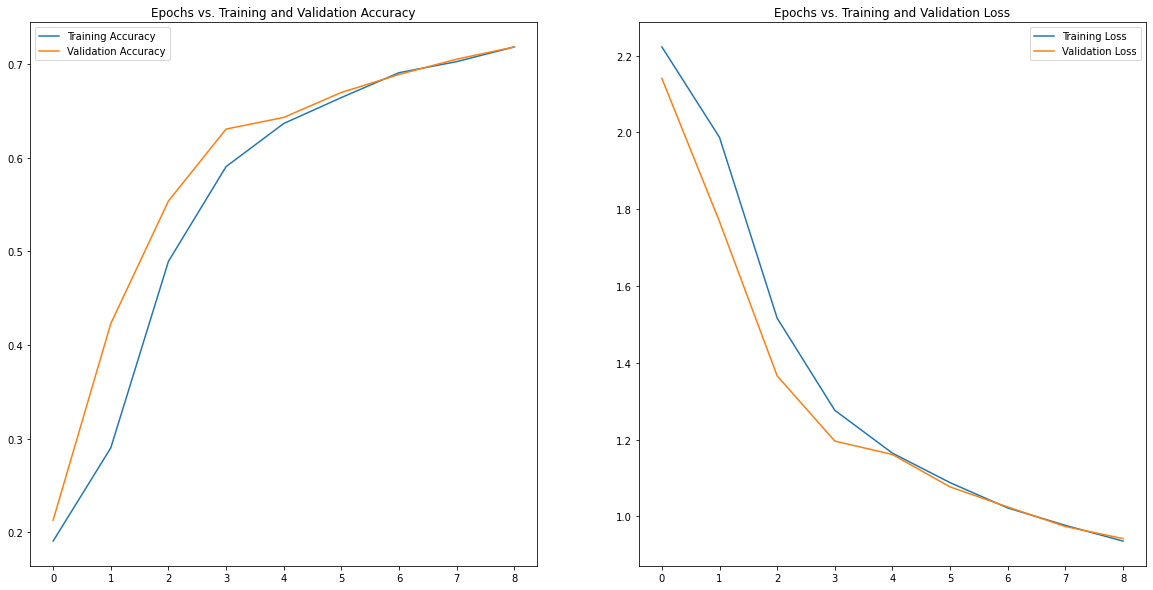

In [51]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 350)               358750    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                17550     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 376,810
Trainable params: 376,810
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Test the model after training
test_results = model.evaluate(X_test, test_labels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

26032/26032 [==============================] - 2s 66us/sample - loss: 1.0480 - acc: 0.6941
Test results - Loss: 1.0480499152178844 - Accuracy: 0.6940688490867615%


# Confusion Matrix

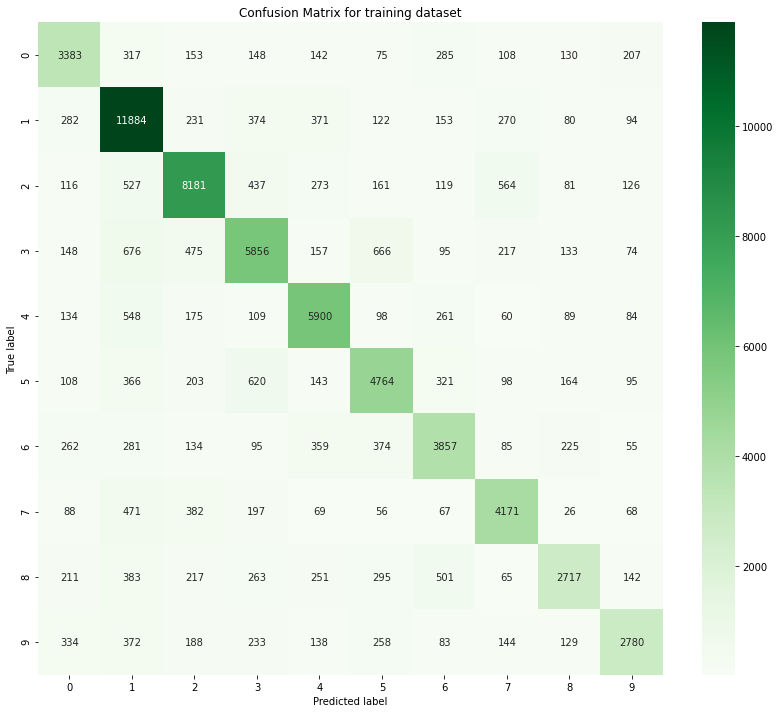

In [54]:
y_pred = model.predict(X_train)
y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(train_labels, lb.classes_)


# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred, target_names=class_names))



              precision    recall  f1-score   support

           0       0.67      0.68      0.68      4948
           1       0.75      0.86      0.80     13861
           2       0.79      0.77      0.78     10585
           3       0.70      0.69      0.70      8497
           4       0.76      0.79      0.77      7458
           5       0.69      0.69      0.69      6882
           6       0.67      0.67      0.67      5727
           7       0.72      0.75      0.73      5595
           8       0.72      0.54      0.62      5045
           9       0.75      0.60      0.66      4659

    accuracy                           0.73     73257
   macro avg       0.72      0.70      0.71     73257
weighted avg       0.73      0.73      0.73     73257

